In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=200,resize=0.7)
image_shape=people.images[0].shape

counts=np.bincount(people.target)
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people=X_people/255

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

pca = PCA(n_components=100)
X = pca.fit_transform(people.data)
X = normalize(X)
y = people.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
pred = knn.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score




C:\Users\adity\AppData\Local\Temp/ipykernel_13448/1105956719.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros(people.target.shape,dtype=np.bool)


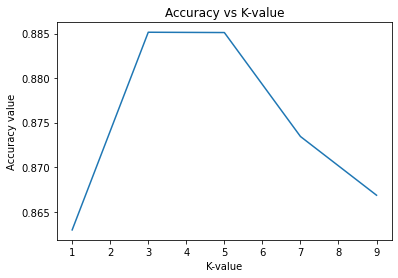

In [2]:
# 1. Vary value of K 1,3,5,7,9 and draw accuracy graph KNN.
accuracy_l= []
for i in [1, 3, 5, 7, 9]:
    classifier= KNeighborsClassifier(n_neighbors= i)
    score= cross_val_score(classifier, X, y, cv=10)
    accuracy_l.append(score.mean())
import matplotlib.pyplot as plt
plt.plot([1, 3, 5, 7, 9], accuracy_l)
plt.title('Accuracy vs K-value')
plt.xlabel('K-value')
plt.ylabel('Accuracy value')
accuracy_x= []

Text(0, 0.5, 'Accuracy value')

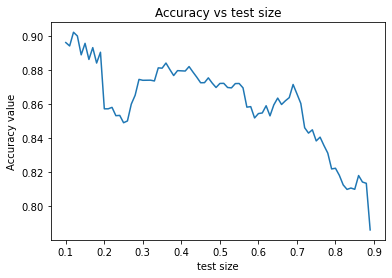

In [3]:
for i in np.arange(0.1, 0.9, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 15)
    classifier = KNeighborsClassifier(n_neighbors=3)

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_x.append(accuracy)
plt.plot(np.arange(0.1, 0.9, 0.01), accuracy_x)
plt.title('Accuracy vs test size')
plt.xlabel('test size')
plt.ylabel('Accuracy value')

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.12, random_state = 15)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9021739130434783
